In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.path import *
import os
from PIL import Image

In [25]:
def process_file(file_path):
    result = []
    with open(file_path, 'r') as file:
        for line in file:
            arr = []
            for x in line.strip().split(','):
                try:
                    # Convert to float and then to int
                    value = int(float(x.strip()))
                    arr.append(value)
                except ValueError:
                    # Skip empty or invalid entries
                    continue
            if arr:  # Only add non-empty arrays
                result.append(arr)
    return result


# a= process_file(r"D:\Development\Dataset\DRIONS-DB\experts_anotation\anotExpert1_001.txt")

In [26]:
annotations=[]

for file in os.listdir(r"D:\Development\Dataset\DRIONS-DB\experts_anotation"):
    annotations.append(process_file(f"D:/Development/Dataset/DRIONS-DB/experts_anotation/{file}"))
# i=0
# for file in os.listdir(r"D:\Development\Dataset\DRIONS-DB\experts_anotation"):
#     print(file)
#     i+=1

In [27]:
annotations_expert_1=annotations[:110]
annotations_expert_2=annotations[110:]

In [28]:
len(annotations_expert_2)

110

In [29]:
i=0

ann=[]
for border in annotations_expert_1:
    # Define the size of the array
    array_size = (256, 256)  # Note: size is (rows, columns) for (height, width)

    # Create an empty array with zeros
    data = np.zeros(array_size, dtype=np.uint8)

    # List of coordinates to set to 1
    coordinates = border  # Replace this with your actual coordinates
    coords_array = np.array(coordinates)

    # Create a path from the coordinates
    polygon_path = Path(coords_array)

    # Create a grid of coordinates
    x, y = np.indices(array_size)

    # Check which points are inside the polygon
    points = np.vstack((y.ravel(), x.ravel())).T  # Note: x, y needs to be swapped
    mask = polygon_path.contains_points(points)

    # Convert the mask to a 2D array
    mask_2d = mask.reshape(array_size)

    # Set the area to 1 in the data array
    data[:] = mask_2d.astype(np.uint8)
    # print(i)
    # i+=1

    ann.append(data)
    # # Display the array
    # plt.imshow(data, cmap='gray', vmin=0, vmax=1)  # Use cmap='gray' for grayscale image
    # # plt.colorbar()  # Optional: add a colorbar
    # plt.show()

In [30]:
annotations_expert_1 = ann

In [31]:
# len(annotations_expert_1[0])

In [32]:
i=0

ann=[]
for border in annotations_expert_2:
    # Define the size of the array
    array_size = (256, 256)  # Note: size is (rows, columns) for (height, width)

    # Create an empty array with zeros
    data = np.zeros(array_size, dtype=np.uint8)

    # List of coordinates to set to 1
    coordinates = border  # Replace this with your actual coordinates
    coords_array = np.array(coordinates)

    # Create a path from the coordinates
    polygon_path = Path(coords_array)

    # Create a grid of coordinates
    x, y = np.indices(array_size)

    # Check which points are inside the polygon
    points = np.vstack((y.ravel(), x.ravel())).T  # Note: x, y needs to be swapped
    mask = polygon_path.contains_points(points)

    # Convert the mask to a 2D array
    mask_2d = mask.reshape(array_size)

    # Set the area to 1 in the data array
    data[:] = mask_2d.astype(np.uint8)
    print(i)
    i+=1

    ann.append(data)
    # # Display the array
    # plt.imshow(data, cmap='gray', vmin=0, vmax=1)  # Use cmap='gray' for grayscale image
    # # plt.colorbar()  # Optional: add a colorbar
    # plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109


In [33]:
annotations_expert_2 = ann


In [34]:
annotations_expert_1 = np.array(annotations_expert_1).astype(np.float32)

In [35]:
annotations_expert_2 = np.array(annotations_expert_2).astype(np.float32)

In [36]:
# path to images directory D:\Development\Dataset\DRIONS-DB\images

In [37]:
images_dir=r"D:\Development\Dataset\DRIONS-DB\images"

# Initialize a list to store images
images = []

# Load, resize, and append images
for filename in os.listdir(images_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Add other extensions if needed
        img_path = os.path.join(images_dir, filename)
        img = Image.open(img_path).convert('RGB')  # Ensure image is RGB
        img = img.resize((256, 256))  # Resize to (600, 400)
        images.append(np.array(img))

# Convert list to numpy array
X = np.array(images)

# Normalize the images
X = X / 255.0  # Normalize to the range [0, 1]




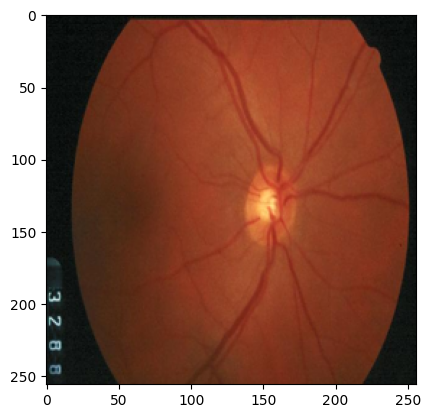

In [40]:
# Display the array
plt.imshow(X[12], cmap='gray', vmin=0, vmax=1)  # Use cmap='gray' for grayscale image
# plt.colorbar()  # Optional: add a colorbar
plt.show()

MODEL CONSTRUCTION BEGINS HERE


In [22]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate


In [23]:
inputs = Input(shape= (256, 256, 3))
conv1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(inputs)
conv1 = Dropout(0.3)(conv1)
conv1 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Dropout(0.3)(conv2)
conv2 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool2)
conv3 = Dropout(0.3)(conv3)
conv3 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

conv4 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool3)
conv4 = Dropout(0.3)(conv4)
conv4 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

conv5 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(pool4)
conv5 = Dropout(0.3)(conv5)
conv5 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv5)

up6 = Concatenate(axis=1)([UpSampling2D(size=(2, 2))(conv5), conv4])
conv6 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(up6)
conv6 = Dropout(0.3)(conv6)
conv6 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv6)

up7 = Concatenate(axis=1)([UpSampling2D(size=(2, 2))(conv6), conv3])
conv7 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(up7)
conv7 = Dropout(0.3)(conv7)
conv7 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv7)

up8 = Concatenate(axis=1)([UpSampling2D(size=(2, 2))(conv7), conv2])
conv8 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(up8)
conv8 = Dropout(0.3)(conv8)
conv8 = Conv2D(64, kernel_size=3, activation='relu', padding='same')(conv8)

# up9 = Concatenate(axis=1)([UpSampling2D(size=(2, 2))(conv8), conv1])
# conv9 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(up9)
# conv9 = Dropout(0.3)(conv9)
# conv9 = Conv2D(32, kernel_size=3, activation='relu', padding='same')(conv9)

conv10 = Conv2D(1, kernel_size=1, activation='sigmoid', padding='same')(conv8)

model = Model(inputs=inputs, outputs=conv10)


In [18]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      9,248 │ dropout[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ dropout_1[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     36,928 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     36,928 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │     36,928 │ dropout_3[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 508,769 (1.94 MB)

 Trainable params: 508,769 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.utils import load_img


In [42]:
checkpoint_callback = ModelCheckpoint(
    r'D:\PROJECT\Deep_Learning_Projects\DRIONS Gluocoma\model_from_paper_anotator_1.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [21]:
# Fit the model
history = model.fit(
    X, 
    annotations_expert_1, 
    epochs=5,  # Adjust the number of epochs as needed
    batch_size=4,  # Adjust the batch size as needed
    validation_split=0.2,  # Adjust the validation split as needed
    callbacks=[checkpoint_callback]
)

Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(4, 256, 256), output.shape=(4, 512, 128)

In [ ]:
print('TensorFlow version:', tf.__version__)

In [ ]:
checkpoint_callback = ModelCheckpoint(
    r'D:\PROJECT\Deep_Learning_Projects\DRIONS Gluocoma\model_checkpoint_annotator_2.keras',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

In [ ]:
# Fit the model
history = model.fit(
    X, 
    annotations_expert_2, 
    epochs=5,  # Adjust the number of epochs as needed
    batch_size=4,  # Adjust the batch size as needed
    validation_split=0.2,  # Adjust the validation split as needed
    callbacks=[checkpoint_callback]
)